# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

### What are the predictors and dependent variable ?

Predictors are GRE, GPA, and Presitge. Dependent variable is Admission

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

My hypothesis is that the prestige will have the grestest impact on admissions

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

In [9]:
data = pd.read_csv('../assets/admissions.csv')

In [10]:
data.shape

(400, 4)

In [11]:
data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


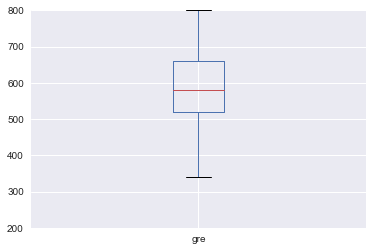

In [12]:
#data.plot(kind="box")
data['gre'].plot(kind='box',ylim=(200,800))



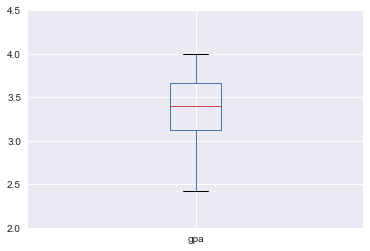

In [13]:
data['gpa'].plot(kind='box',ylim=(2,4.5))

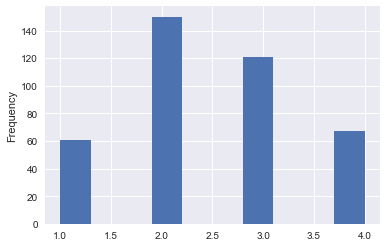

In [14]:
data['prestige'].plot(kind='hist')

In [15]:
data.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [16]:
data.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [17]:
print data['admit'].isnull().sum()
print data['gre'].isnull().sum()
print data['gpa'].isnull().sum()
print data['prestige'].isnull().sum()

0
2
2
1


In [18]:
data1 = data.dropna()

In [19]:
data1.shape

(397, 4)

### FInd the correlation of each feature with admission

In [20]:
data1.shape

(397, 4)

In [21]:
data1.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.755)


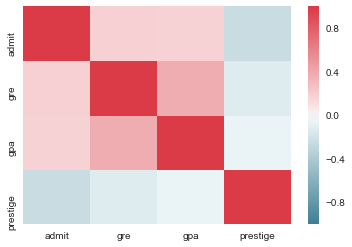

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data1[['admit', 'gre','gpa', 'prestige' ]].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### How do you deal with the prestige feature?

In [23]:
data2 = data1.join(pd.get_dummies(data1['prestige']))

In [24]:
data2.shape

(397, 8)

In [25]:
data2.head()

,admit,gre,gpa,prestige,1.0,2.0,3.0,4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [49]:
from scipy.stats import zscore
#zscoredata = data2[['gre', 'gpa']]
#zscoredata.apply(zscore)
#zscore


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [26]:
from sklearn import grid_search, cross_validation, neighbors
import matplotlib.pyplot as plt

admit = data2.admit
k = range(2, 100)
params = {'n_neighbors': k }


kf = cross_validation.KFold(len(data2), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(data2, admit)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=397, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
from sklearn.linear_model import LogisticRegression
gs1 = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(data2), n_folds=5),
    scoring='recall')
gs1.fit(data2, admit)


/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/michaeltong/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated

GridSearchCV(cv=sklearn.cross_validation.KFold(n=397, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'class_weight': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [49]:
print('Best score Kneightbors:', gs.best_score_)
print('Best score LogisticRegression:', gs1.best_score_)

('Best score Kneightbors:', 0.8236775818639799)
('Best score LogisticRegression:', 1.0)


In [39]:
print gs.best_estimator_
print gs1.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [51]:
lm=LogisticRegression()

lm.fit(data2[['gre', 'gpa', 1, 2, 3,]], data2['admit'])
#print gs.best_params_
#print gs1.best_params_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
print lm.coef_
print lm.intercept_
print data2.admit.mean()

#print(gs1.coef_)
#print(gs1.coef_)
#gs.grid_scores_

[[  1.58889206e-03   1.84631226e-04   1.16761197e+00   5.26947990e-01
   -3.80822675e-02]]
[-2.07018745]
0.317380352645


In [53]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print data2.admit.mean()

[[ 1.00159016  1.00018465  3.2143076   1.69375505  0.96263374]]
[ 0.12616213]
0.317380352645


### What is the most important feature that contributes to the students probability of admission? 

Having gone to a Prestige School 1 contributes the most to admission

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [42]:
import sklearn.linear_model as lm
features = [i for i in data2.columns]

model = lm.LogisticRegression()
model.fit(data2[features[1:]], data2['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
data2['probability'] = model.predict_proba(data2[features[1:]]).T[1]

/Users/michaeltong/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


TypeError: Empty 'DataFrame': no numeric data to plot

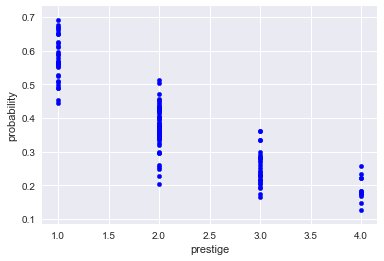

In [44]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    data2[data2[features[e]] == 1].plot(x='prestige', y='probability', kind='scatter', colors = c, ax=ax)

ax.set(title='Probability of Admission\n Based on prestige')

TypeError: Empty 'DataFrame': no numeric data to plot

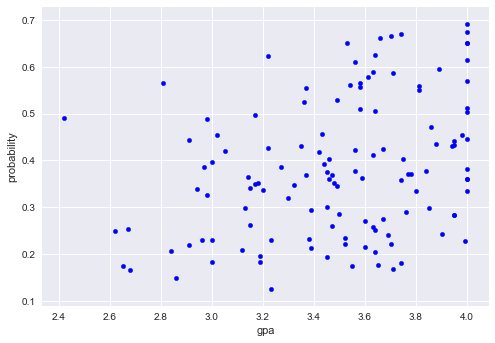

In [98]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    data2[data2[features[e]] == 1].plot(x='gpa', y='probability', kind='scatter', colors = c, ax=ax)

ax.set(title='Probability of Admission\n Based on prestige')

TypeError: Empty 'DataFrame': no numeric data to plot

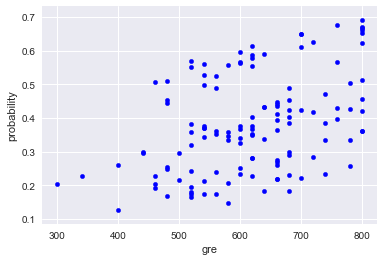

In [56]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    data2[data2[features[e]] == 1].plot(x='gre', y='probability', kind='scatter', colors = c, ax=ax)

ax.set(title='Probability of Admission\n Based on GRE')